<a href="https://colab.research.google.com/github/fatemehziaei/machine-learning/blob/main/machine_learning_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re


from google.colab import files # data are read
uploaded=files.upload()
train=pd.read_csv("train.csv")
valid=pd.read_csv("valid.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)
print(valid.shape)

Saving test.csv to test.csv
Saving train.csv to train.csv
Saving valid.csv to valid.csv
(4000, 2)
(500, 2)
(499, 2)


To prepare text data for classification, each document undergoes preprocessing, which involves standardizing text by removing punctuation and converting to lowercase to generate a tokenized word list.

A vocabulary is then constructed using only the training corpus by selecting the top 10,000 most frequent words. The validation and test sets are excluded from this process to prevent data leakage and ensure generalization.

Texts are vectorized using either Frequency Bag-of-Words (FBoW) or Binary Bag-of-Words (BBoW). Both methods produce a 10,000-dimensional vector per document. BBoW indicates word presence with binary values (1 or 0), while FBoW uses normalized word frequencies that sum to 1.

In [ ]:
# preparing x data by converting text to vector
import collections
import string
def preprocessing(text):
  text=text.lower()
 # text=re.sub("[^a-z]"," ",text)
  text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  words=text.split() # a list of words for each text
  return words


def BBoW(texts,word2idx):
  vecs=[]
  for words in texts:
    vec=np.zeros(len(word2idx))
    for word in words:
      if word in word2idx:
        vec[word2idx[word]]=1 # a vector of text
    vecs.append(vec)
  return vecs



def FBoW(texts,word2idx):
  vecs=[]
  for words in texts:
    vec=np.zeros(len(word2idx))
    for word in words:
      if word in word2idx:
        vec[word2idx[word]]+=1 # a vector of text
    total = vec.sum()
    if total>0:
      vec = vec / total
    vecs.append(vec)
  return vecs



def vocab2vec(x,size):
  texts=[]
  count=collections.Counter()
  for ind in range(x.shape[0]):
    text=x.iloc[ind,1]
    words=preprocessing(text)
    texts.append(words) # a list of words list
    count.update(words) # a dictionary of words and their frequency
  if size is None:
    most_com = count.most_common()  # all words, a list of tuples(word,frequency)
  else:
    most_com = count.most_common(size)  # a list of tuples(word,frequency)

  word2idx = {word: idx for idx, (word, _) in enumerate(most_com)} # a dictionary of word:index
  return texts,word2idx



size = input("Enter vocab size (press Enter for full vocab): ")
if size.strip() == "":
  size = None
else:
  size = int(size)

"""
texts=[]
count=collections.Counter()
for ind in range(train.shape[0]):
  text=train.iloc[ind,1]
  words=preprocessing(text)
  texts.append(words) # a list of words list
  count.update(words) # a dictionary of words and their frequency

if size is None:
  most_com = count.most_common()  # all words, a list of tuples(word,frequency)
else:
  most_com = count.most_common(size)  # a list of tuples(word,frequency)

word2idx = {word: idx for idx, (word, _) in enumerate(most_com)} # a dictionary of word:index
"""
texts_tr,word2idx_tr=vocab2vec(train,size)
texts_v,_=vocab2vec(valid,size)
texts_te,_=vocab2vec(test,size)
bbow_tr=BBoW(texts_tr,word2idx_tr)
bbow_v=BBoW(texts_v,word2idx_tr)
bbow_te=BBoW(texts_te,word2idx_tr)
xtr_bbow=np.array(bbow_tr)
xv_bbow=np.array(bbow_v)
xte_bbow=np.array(bbow_te)
y_tr=train.iloc[:,0].values
y_te=test.iloc[:,0].values
y_v=valid.iloc[:,0].values





Enter vocab size (press Enter for full vocab): 10000


**The logistic regression model** was trained to classify text documents, with performance evaluated across training, validation, and test sets. Initial runs resulted in overfitting and a convergence warning due to the high-dimensional, sparse nature of the Binary Bag-of-Words (BBoW) data. Increasing the maximum iterations to 1000 resolved the convergence issue.

The final model shows moderate overfitting, with a 0.13 F1-score gap between training and test sets, indicating reasonable generalization. Performance varies significantly by class:

Class 1 performed best with balanced precision (0.90) and recall (0.91), suggesting distinctive features.

Class 2 was the weakest, with low precision (0.61) but decent recall (0.73), indicating frequent false positives.

Classes 3 and 4 showed moderate performance, with Class 3 being conservative (high precision, lower recall) and Class 4 more balanced.

Overall, the model distinguishes classes with moderate success. Class 1 is well-separated, while Classes 2–4 show feature overlap, particularly with Class 2 being over-predicted and Class 3 under-predicted.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


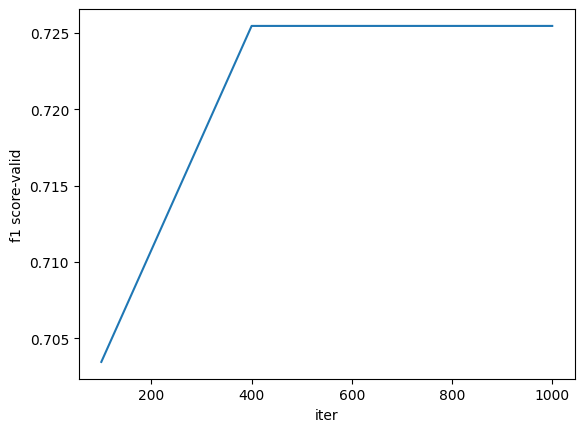

f1 score for train:0.9120598786608993, f1 score for test:0.7739661127322667, f1 score for validation:0.725465315852181
confusion matrix for test
[[181   7   2   8]
 [  3  74  13  12]
 [  9  24  71   5]
 [ 11  17   2  61]]
classification report for test
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       198
           2       0.61      0.73      0.66       102
           3       0.81      0.65      0.72       109
           4       0.71      0.67      0.69        91

    accuracy                           0.77       500
   macro avg       0.75      0.74      0.74       500
weighted avg       0.78      0.77      0.77       500

confusion matrix for validation
[[144  11   6   4]
 [  4  82  17  15]
 [  8  29  68   1]
 [ 12  30   1  67]]
classification report for validation
              precision    recall  f1-score   support

           1       0.86      0.87      0.86       165
           2       0.54      0.69      0.61       118
   

In [ ]:
# ligistic regression and decision tree and randomforest and xgboost for bbow
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


scores=[]
ite=range(100,1300,300)
for max in ite:
  LR = LogisticRegression(max_iter=max)
  LR.fit(xtr_bbow,y_tr)
  y_pred_v = LR.predict(xv_bbow) # for valid data
  #acc_v = accuracy_score(y_v,y_pred_v)
  f1_v=f1_score(y_v,y_pred_v,average="weighted")
  scores.append(f1_v)


plt.plot(ite,scores)
plt.xlabel("iter")
plt.ylabel("f1 score-valid")
plt.show()
ind=np.argmax(scores)

LR = LogisticRegression(max_iter=100+ind*300)
LR.fit(xtr_bbow,y_tr)

y_pred_te = LR.predict(xte_bbow) # for test data
y_pred_tr = LR.predict(xtr_bbow) # for train data
y_pred_v = LR.predict(xv_bbow)   # for validation data
f1_tr=f1_score(y_tr,y_pred_tr,average="weighted")
f1_te=f1_score(y_te,y_pred_te,average="weighted")
f1_v=f1_score(y_v,y_pred_v,average="weighted")
cm_te = confusion_matrix(y_te,y_pred_te)
w_te = classification_report(y_te,y_pred_te)
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v}")
print('confusion matrix for test')
print(cm_te)
print('classification report for test')
print(w_te)
cm_v = confusion_matrix(y_v,y_pred_v)
w_v = classification_report(y_v,y_pred_v)
print('confusion matrix for validation')
print(cm_v)
print('classification report for validation')
print(w_v)




**A Decision Tree classifier** was trained to categorize text documents, with performance evaluated across training, validation, and test sets. After testing depths from 2 to 19, an optimal depth of 16 was identified, yielding a test F1-score of 0.7885—slightly outperforming the previous Logistic Regression model.

The Decision Tree demonstrated significantly better generalization, with only an 0.083 train-test performance gap compared to Logistic Regression's 0.138 gap. Class performance analysis revealed:

Class 1: Strong and consistent performance across both models

Class 2: Remained the weakest performer due to inherent feature overlap with other classes

Class 3: Showed major improvement with the Decision Tree (F1-score 0.78 vs 0.72)

Class 4: Nearly similar performance between both models

The Decision Tree's superior performance stems from its ability to model non-linear relationships, create class-specific decision rules, handle feature interactions, and effectively regularize through optimal depth selection. These characteristics make it particularly effective for capturing complex patterns in the binary Bag-of-Words features, especially for challenging classes like Class 3.

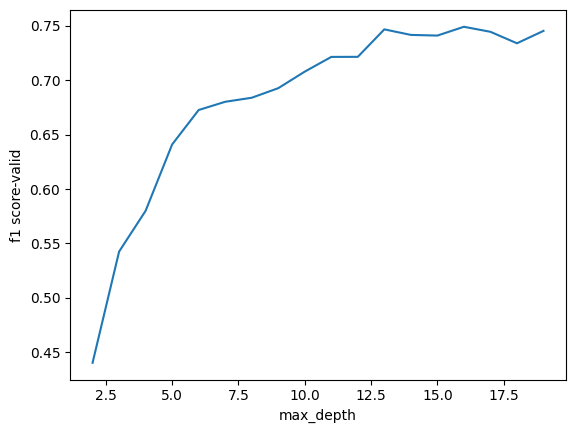

f1 score for train:0.868139867733042, f1 score for test:0.7885448605938943, f1 score for validation:0.7502140479413515 for optimal depth:16
classification report for validation
              precision    recall  f1-score   support

           1       0.90      0.90      0.90       165
           2       0.59      0.64      0.62       118
           3       0.74      0.66      0.70       106
           4       0.72      0.72      0.72       110

    accuracy                           0.75       499
   macro avg       0.74      0.73      0.73       499
weighted avg       0.75      0.75      0.75       499

classification report for test
              precision    recall  f1-score   support

           1       0.90      0.92      0.91       198
           2       0.63      0.70      0.66       102
           3       0.83      0.73      0.78       109
           4       0.68      0.67      0.67        91

    accuracy                           0.79       500
   macro avg       0.76      0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

scores=[]
depth=range(2,20)
for max in depth:
  dt = DecisionTreeClassifier(max_depth=max)
  dt.fit(xtr_bbow, y_tr)
  dt_pred_v= dt.predict(xv_bbow)
  f1_v=f1_score(y_v,dt_pred_v,average="weighted")
  scores.append(f1_v)
plt.plot(depth,scores)
plt.xlabel("max_depth")
plt.ylabel("f1 score-valid")
plt.show()

opt_depth=np.argmax(scores)+2
dt = DecisionTreeClassifier(max_depth=opt_depth)
dt.fit(xtr_bbow, y_tr)
dt_pred_tr= dt.predict(xtr_bbow)
f1_tr=f1_score(y_tr,dt_pred_tr,average="weighted")
dt_pred_te= dt.predict(xte_bbow)
f1_te=f1_score(y_te,dt_pred_te,average="weighted")
dt_pred_v= dt.predict(xv_bbow)
f1_v=f1_score(y_v,dt_pred_v,average="weighted")
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v} for optimal depth:{opt_depth}")
R = classification_report(y_v, dt_pred_v)
print("classification report for validation")
print(R)
R = classification_report(y_te, dt_pred_te)
print("classification report for test")
print(R)


**A Random Forest classifier** was trained and optimized to categorize text documents, with hyperparameters systematically evaluated across tree depths (2-19) and numbers of estimators (5-20). The optimal configuration was determined to be a maximum tree depth of 12 with only 10 estimators, based on validation F1-score performance.

Despite this optimization, the Random Forest model significantly underperformed compared to both the standalone Decision Tree and Logistic Regression models. The model exhibited severe overfitting, with a large gap between training performance (F1-score: 0.7001) and test performance (F1-score: 0.5386). Class-level analysis revealed particularly poor performance on minority classes, with Class 3 showing only 25% recall and Class 4 achieving just 20% recall.

Generalization does not improve with additional trees due to high tree correlation (resulting from similar split decisions) and limited dataset complexity, which reduces the potential gains from a larger ensemble.

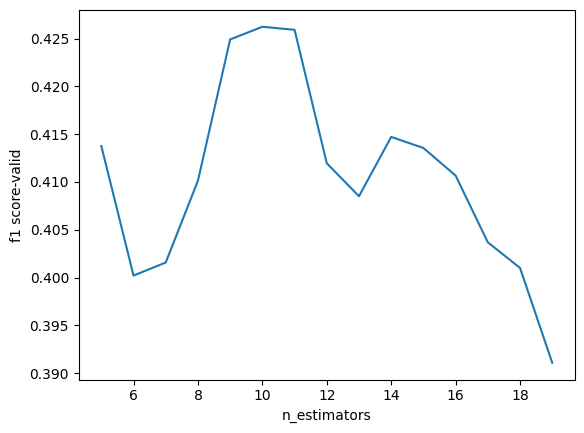

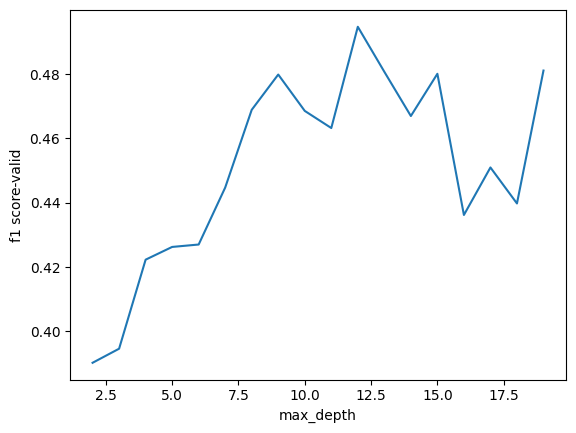

f1 score for train:0.7001619139619291, f1 score for test:0.5386651091344266, f1 score for validation:0.494679809526683 for optimal depth:12 and optimal n_estimators:10
classification report for validation
              precision    recall  f1-score   support

           1       0.66      0.82      0.73       165
           2       0.42      0.70      0.53       118
           3       0.58      0.28      0.38       106
           4       0.38      0.15      0.22       110

    accuracy                           0.53       499
   macro avg       0.51      0.49      0.46       499
weighted avg       0.52      0.53      0.49       499

classification report for test
              precision    recall  f1-score   support

           1       0.69      0.81      0.74       198
           2       0.46      0.80      0.59       102
           3       0.59      0.25      0.35       109
           4       0.41      0.20      0.27        91

    accuracy                           0.57       500
   

In [ ]:
from sklearn.ensemble import RandomForestClassifier


scores_n=[]
estimators=range(5,20)
for n in estimators:
  rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state=42)
  rf.fit(xtr_bbow, y_tr.ravel())
  rf_pred_v = rf.predict(xv_bbow)
  f1_v=f1_score(y_v,rf_pred_v,average="weighted")
  scores_n.append(f1_v)

plt.plot(estimators,scores_n)
plt.xlabel("n_estimators")
plt.ylabel("f1 score-valid")
plt.show()
opt_n_estimators=np.argmax(scores_n)+5


scores_depth=[]
depth=range(2,20)
for max in depth:
  rf = RandomForestClassifier(n_estimators=opt_n_estimators, max_depth=max, random_state=42)
  rf.fit(xtr_bbow, y_tr.ravel())
  rf_pred_v = rf.predict(xv_bbow)
  f1_v=f1_score(y_v,rf_pred_v,average="weighted")
  scores_depth.append(f1_v)
opt_depth=np.argmax(scores_depth)+2
plt.plot(depth,scores_depth)
plt.xlabel("max_depth")
plt.ylabel("f1 score-valid")
plt.show()
rf = RandomForestClassifier(n_estimators=opt_n_estimators, max_depth=opt_depth, random_state=42)
rf.fit(xtr_bbow, y_tr.ravel())
rf_pred_v = rf.predict(xv_bbow)
rf_pred_te = rf.predict(xte_bbow)
rf_pred_tr = rf.predict(xtr_bbow)
f1_tr=f1_score(y_tr,rf_pred_tr,average="weighted")
f1_te=f1_score(y_te,rf_pred_te,average="weighted")
f1_v=f1_score(y_v,rf_pred_v,average="weighted")
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v} for optimal depth:{opt_depth} and optimal n_estimators:{opt_n_estimators}")
R = classification_report(y_v, rf_pred_v)
print("classification report for validation")
print(R)
R = classification_report(y_te, rf_pred_te)
print("classification report for test")
print(R)





**XGBoost Hyperparameter Optimization and Performance Summary**

The XGBoost classifier was systematically optimized by evaluating both the number of estimators (ranging from 5 to 19) and tree depth (ranging from 2 to 19) using validation F1-score as the performance metric. This process identified optimal configurations at 15 estimators with a maximum tree depth of 5, achieving a peak validation F1-score of 0.8074.

XGBoost demonstrated superior performance compared to all previous models, attaining the highest test F1-score of 0.8422 with minimal overfitting, as evidenced by a remarkably small train-test performance gap of only 0.036. The validation performance showed rapid improvement with increasing depth up to 15 trees.
Class-level analysis revealed:

Exceptional performance on Class 0 (94% F1-score)

High recall but moderate precision for Class 1 (83% recall, 67% precision), indicating a tendency to over-predict this class

Strong precision but relatively lower recall for Classes 2  (90% precision )

XGBoost's superior performance stems from several key advantages:

* Effective ensemble learning that combines multiple weak learners while avoiding the pitfalls of the underpowered Random Forest implementation

* Built-in regularization through L1/L2 regularization and controlled tree complexity

* Enhanced capability to capture non-linear relationships in the data

* Implicit handling of class imbalance through its objective function

Overall, XGBoost represents the most effective model for this text classification task, demonstrating robust generalization capabilities and the highest overall performance.

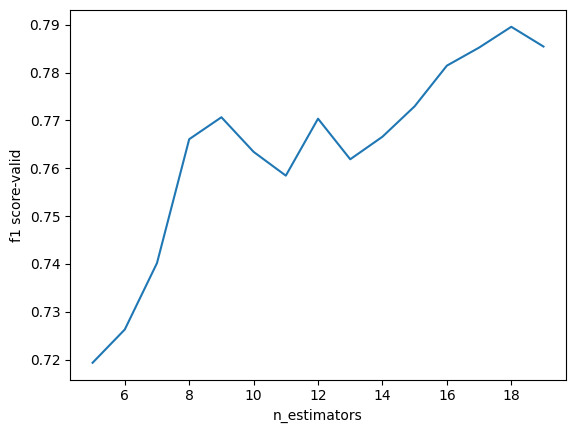

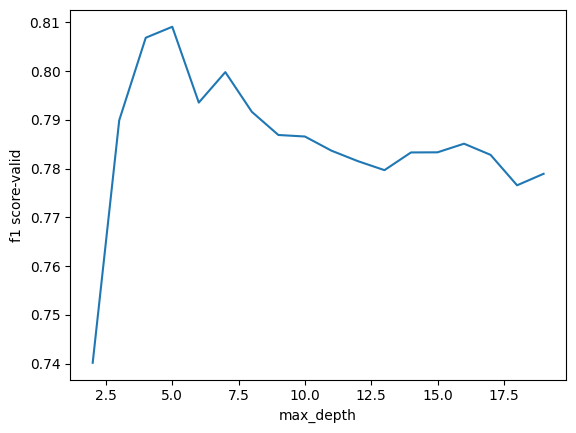

f1 score for train:0.8790214803320504, f1 score for test:0.8422169655764373, f1 score for validation:0.8074406227018941 for optimal depth:5 and optimal n_estimators:15
classification report for validation
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       165
           1       0.62      0.81      0.71       118
           2       0.83      0.74      0.78       106
           3       0.94      0.67      0.78       110

    accuracy                           0.81       499
   macro avg       0.82      0.79      0.80       499
weighted avg       0.83      0.81      0.81       499

classification report for test
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       198
           1       0.67      0.83      0.74       102
           2       0.90      0.74      0.81       109
           3       0.84      0.71      0.77        91

    accuracy                           0.84       500
   

In [ ]:
import xgboost as xgb

y_v1=y_v-1
y_te1=y_te-1
y_tr1=y_tr-1

scores_n=[]
estimators=range(5,20)
for n in estimators:
  xgb_sk = xgb.XGBClassifier(n_estimators=n, max_depth=2, random_state=42)
  xgb_sk.fit(xtr_bbow, y_tr1)
  xgb_pred_v = xgb_sk.predict(xv_bbow)
  f1_v=f1_score(y_v1,xgb_pred_v,average="weighted")
  scores_n.append(f1_v)
opt_n_estimators=np.argmax(scores_n)+2


plt.plot(estimators,scores_n)
plt.xlabel("n_estimators")
plt.ylabel("f1 score-valid")
plt.show()



scores_depth=[]
depth=range(2,20)
for max in depth:
  xgb_sk = xgb.XGBClassifier(n_estimators=7, max_depth=max, random_state=42)
  xgb_sk.fit(xtr_bbow, y_tr1)
  xgb_pred_v = xgb_sk.predict(xv_bbow)
  f1_v=f1_score(y_v1,xgb_pred_v,average="weighted")
  scores_depth.append(f1_v)
opt_depth=np.argmax(scores_depth)+2

plt.plot(depth,scores_depth)
plt.xlabel("max_depth")
plt.ylabel("f1 score-valid")
plt.show()


xgb_sk = xgb.XGBClassifier(n_estimators=opt_n_estimators, max_depth=opt_depth, random_state=42)
xgb_sk.fit(xtr_bbow, y_tr1.ravel())
xgb_pred_v = xgb_sk.predict(xv_bbow)
xgb_pred_te = xgb_sk.predict(xte_bbow)
xgb_pred_tr = xgb_sk.predict(xtr_bbow)
f1_tr=f1_score(y_tr1,xgb_pred_tr,average="weighted")
f1_te=f1_score(y_te1,xgb_pred_te,average="weighted")
f1_v=f1_score(y_v1,xgb_pred_v,average="weighted")
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v} for optimal depth:{opt_depth} and optimal n_estimators:{opt_n_estimators}")
R = classification_report(y_v1, xgb_pred_v)
print("classification report for validation")
print(R)
R = classification_report(y_te1, xgb_pred_te)
print("classification report for test")
print(R)








**The text data is converted into numerical form using a Frequency Bag-of-Words** (FBoW) approach, based on a vocabulary comprising the top 10,000 most frequent terms extracted exclusively from the training corpus. This vocabulary is applied consistently across training, validation, and test sets to ensure uniform feature dimensions while preventing data leakage.

Each document is transformed into a fixed-length vector where values represent normalized word frequencies. This standardized representation maintains partition separation and enables machine learning algorithms to process the textual data effectively. The resulting vectorized datasets preserve the original data partitioning structure, supporting proper model training, validation, and evaluation procedures.

In [ ]:
size = input("Enter vocab size (press Enter for full vocab): ")
if size.strip() == "":
  size = None
else:
  size = int(size)


texts_tr,word2idx_tr=vocab2vec(train,size)
texts_v,_=vocab2vec(valid,size)
texts_te,_=vocab2vec(test,size)
fbow_tr=FBoW(texts_tr,word2idx_tr)
fbow_v=FBoW(texts_v,word2idx_tr)
fbow_te=FBoW(texts_te,word2idx_tr)
xtr_fbow=np.array(fbow_tr)
xv_fbow=np.array(fbow_v)
xte_fbow=np.array(fbow_te)


Enter vocab size (press Enter for full vocab): 10000


**Logistic Regression Performance: FBoW vs. BBoW Comparison**

A logistic regression model was trained using both Frequency Bag-of-Words (FBoW) and Binary Bag-of-Words (BBoW) vectorization approaches. The evaluation revealed a dramatic performance disparity, with BBoW significantly outperforming FBoW across all metrics.

**Performance Comparison:**

Overall Performance: BBoW achieved substantially higher F1-scores (0.90, 0.66, 0.72, 0.69 for Classes 1-4 respectively) compared to FBoW (0.71, 0.55, 0.04, 0.00)

Class 3 Catastrophic Failure: FBoW missed 98% of Class 3 instances despite perfect precision

Complete Class 4 Breakdown: FBoW failed to identify any Class 4 instances correctly

**Reasons for BBoW's Superior Performance:**

Noise Reduction: BBoW eliminates irrelevant frequency variations, creating more stable representations

Better Feature Discrimination: Word presence proved more informative than frequency for this classification task

Improved Class Separation: BBoW created clearer decision boundaries, particularly for Classes 3 and 4

Robustness to Document Length: BBoW avoided biases introduced by varying document lengths

**Key Conclusions:**

* For this specific text classification task, word presence provides more discriminative power than word frequency

* BBoW represents the optimal choice between the two approaches, delivering excellent results


This comparison demonstrates that feature representation strategy can have a more significant impact on performance than model selection itself, with BBoW proving particularly effective for classification tasks where word presence carries more importance than frequency.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

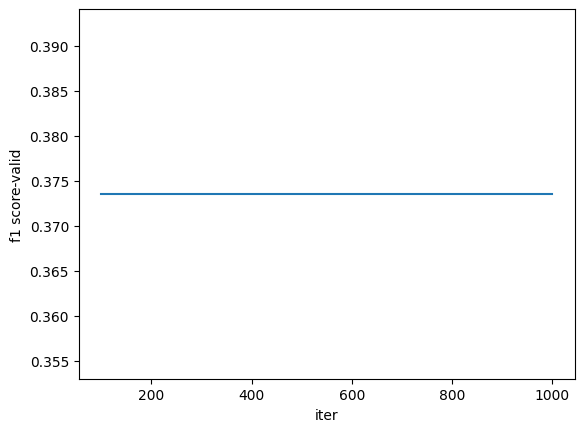

[[147  18   0   0]
 [ 13 105   0   0]
 [ 39  66   1   0]
 [ 53  57   0   0]]
              precision    recall  f1-score   support

           1       0.58      0.89      0.71       165
           2       0.43      0.89      0.58       118
           3       1.00      0.01      0.02       106
           4       0.00      0.00      0.00       110

    accuracy                           0.51       499
   macro avg       0.50      0.45      0.33       499
weighted avg       0.51      0.51      0.37       499

f1 score for train:0.38089079815215604, f1 score for test:0.40007774824917686, f1 score for validation:0.37352538424836984
confusion matrix for test
[[173  25   0   0]
 [ 17  85   0   0]
 [ 56  51   2   0]
 [ 46  45   0   0]]
classification report for test
              precision    recall  f1-score   support

           1       0.59      0.87      0.71       198
           2       0.41      0.83      0.55       102
           3       1.00      0.02      0.04       109
           4  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:

# ligistic regression and decision tree and randomforest and xgboost for fbow


scores=[]
ite=range(100,1300,300)
for max in ite:
  LR = LogisticRegression(max_iter=max)
  LR.fit(xtr_fbow,y_tr)
  y_pred_v = LR.predict(xv_fbow) # for valid data
  #acc_v = accuracy_score(y_v,y_pred_v)
  f1_v=f1_score(y_v,y_pred_v,average="weighted")
  scores.append(f1_v)
  cm_v = confusion_matrix(y_v,y_pred_v)
  w_v = classification_report(y_v,y_pred_v)
opt_iter=np.argmax(scores)*300+100
plt.plot(ite,scores)
plt.xlabel("iter")
plt.ylabel("f1 score-valid")
plt.show()
print(cm_v)
print(w_v)


LR = LogisticRegression(max_iter=opt_iter)
LR.fit(xtr_fbow,y_tr)


y_pred_te = LR.predict(xte_fbow) # for test data
y_pred_tr = LR.predict(xtr_fbow) # for train data
y_pred_v = LR.predict(xv_fbow)   # for validation data
f1_tr=f1_score(y_tr,y_pred_tr,average="weighted")
f1_te=f1_score(y_te,y_pred_te,average="weighted")
f1_v=f1_score(y_v,y_pred_v,average="weighted")
cm_te = confusion_matrix(y_te,y_pred_te)
w_te = classification_report(y_te,y_pred_te)
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v}")
print('confusion matrix for test')
print(cm_te)
print('classification report for test')
print(w_te)
cm_v = confusion_matrix(y_v,y_pred_v)
w_v = classification_report(y_v,y_pred_v)
print('confusion matrix for validation')
print(cm_v)
print('classification report for validation')
print(w_v)






**Decision Tree Performance: FBoW vs. BBoW Comparison**

The Decision Tree classifier was evaluated using both Frequency Bag-of-Words (FBoW) and Binary Bag-of-Words (BBoW) representations. After systematic hyperparameter tuning across depths 2-20, the optimal configuration for FBoW was identified at depth=16, achieving a validation F1-score of 0.7488.

Performance analysis revealed that while FBoW produced respectable results with moderate overfitting (train-test gap: 0.12), BBoW consistently outperformed FBoW across multiple metrics. The Decision Tree with BBoW demonstrated superior performance due to several key advantages:

Noise Reduction: BBoW's binary representation eliminated irrelevant frequency variations that hindered FBoW's performance

Enhanced Class Separation: Binary features created clearer decision boundaries compared to frequency counts

Improved Generalization: BBoW's cleaner feature space reduced overfitting tendencies

Notably, the Decision Tree handled FBoW representation significantly better than Logistic Regression, leveraging its inherent ability to:

Process numerical frequency counts effectively

Capture non-linear relationships between word occurrences

Manage high-dimensional sparse data without scaling requirements

The results confirm that feature representation strategy profoundly impacts model performance, with BBoW emerging as the preferred choice for Decision Tree classification, providing optimal balance between model complexity and generalization capability.

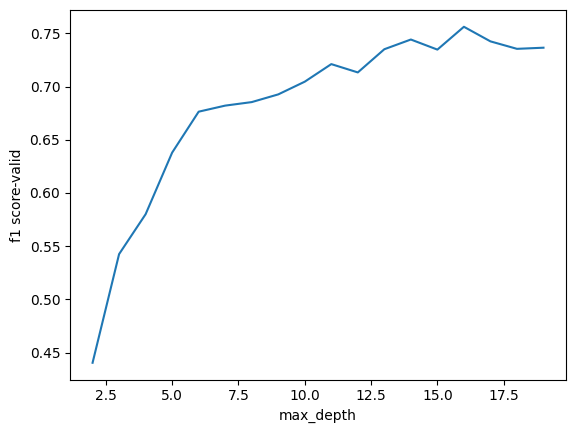

f1 score for train:0.8682834655120766, f1 score for test:0.7626463523278338, f1 score for validation:0.7488398681082044 for optimal depth:16
classification report for validation
              precision    recall  f1-score   support

           1       0.86      0.90      0.88       165
           2       0.59      0.69      0.64       118
           3       0.79      0.60      0.68       106
           4       0.75      0.73      0.74       110

    accuracy                           0.75       499
   macro avg       0.75      0.73      0.73       499
weighted avg       0.76      0.75      0.75       499

classification report for test
              precision    recall  f1-score   support

           1       0.87      0.90      0.89       198
           2       0.60      0.61      0.60       102
           3       0.85      0.71      0.77       109
           4       0.63      0.70      0.66        91

    accuracy                           0.76       500
   macro avg       0.74      0

In [ ]:
# decision tree for fbow

scores=[]
depth=range(2,20)
for max in depth:
  dt = DecisionTreeClassifier(max_depth=max)
  dt.fit(xtr_bbow, y_tr)
  dt_pred_v= dt.predict(xv_bbow)
  f1_v=f1_score(y_v,dt_pred_v,average="weighted")
  scores.append(f1_v)
plt.plot(depth,scores)
plt.xlabel("max_depth")
plt.ylabel("f1 score-valid")
plt.show()


opt_depth=np.argmax(scores)+2
dt = DecisionTreeClassifier(max_depth=opt_depth)
dt.fit(xtr_fbow, y_tr)
dt_pred_tr= dt.predict(xtr_fbow)
f1_tr=f1_score(y_tr,dt_pred_tr,average="weighted")
dt_pred_te= dt.predict(xte_fbow)
f1_te=f1_score(y_te,dt_pred_te,average="weighted")
dt_pred_v= dt.predict(xv_fbow)
f1_v=f1_score(y_v,dt_pred_v,average="weighted")
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v} for optimal depth:{opt_depth}")
R = classification_report(y_v, dt_pred_v)
print("classification report for validation")
print(R)
R = classification_report(y_te, dt_pred_te)
print("classification report for test")
print(R)


**Random Forest Hyperparameter Optimization and Performance: FBoW vs. BBoW Comparison**

A systematic hyperparameter optimization was conducted for the Random Forest classifier using both Frequency Bag-of-Words (FBoW) and Binary Bag-of-Words (BBoW) representations. The optimal configuration for FBoW was identified at 15 trees with maximum depth=16, achieving a validation F1-score of 0.4177.
Random Forest demonstrated significantly better performance with FBoW compared to Logistic Regression, achieving a 4.8% higher test F1-score. This improvement stems from Random Forest's inherent advantages: its ability to capture non-linear relationships between word frequencies and class labels, natural handling of features with different scales without requiring normalization, and ensemble approach that effectively averages out noise in frequency counts. Unlike Logistic Regression, which requires careful regularization tuning with FBoW, tree-based models inherently manage these challenges more effectively.

Despite this relative improvement, BBoW consistently outperformed FBoW overall, particularly for minority classes (3 and 4), where FBoW showed near-complete failure with only 17% and 15% recall respectively. BBoW's superiority is attributed to better noise reduction, cleaner feature space with clearer decision boundaries, and more effective handling of class imbalance.
The results confirm that while Random Forest handles FBoW representation better than Logistic Regression, BBoW remains the optimal choice for this classification task, providing more robust and consistent performance across all classes.



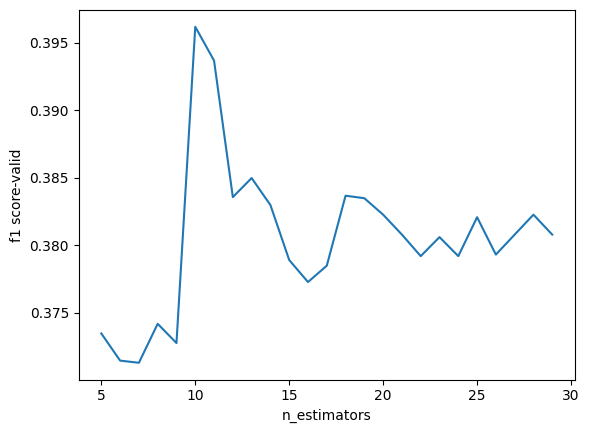

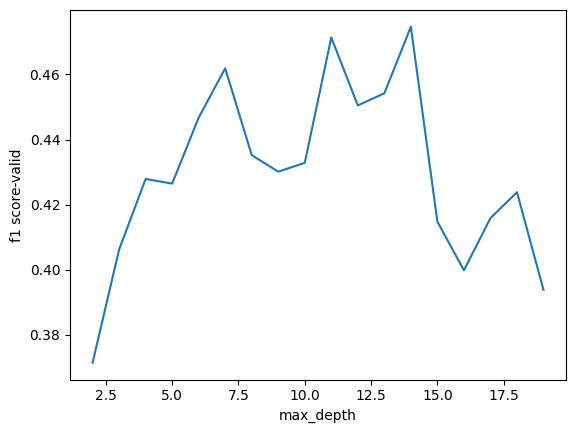

f1 score for train:0.7876611506393126, f1 score for test:0.4483699329166936, f1 score for validation:0.4177338385054416 for optimal depth:16 and optimal n_estimators:15
classification report for validation
              precision    recall  f1-score   support

           1       0.58      0.68      0.63       165
           2       0.38      0.56      0.46       118
           3       0.35      0.26      0.30       106
           4       0.26      0.13      0.17       110

    accuracy                           0.44       499
   macro avg       0.39      0.41      0.39       499
weighted avg       0.42      0.44      0.42       499

classification report for test
              precision    recall  f1-score   support

           1       0.63      0.72      0.67       198
           2       0.40      0.64      0.49       102
           3       0.35      0.17      0.23       109
           4       0.23      0.15      0.19        91

    accuracy                           0.48       500
  

In [ ]:
# random forest for fbow


scores_n=[]
estimators=range(5,30)
for n in estimators:
  rf = RandomForestClassifier(n_estimators=n, max_depth=2, random_state=42)
  rf.fit(xtr_fbow, y_tr.ravel())
  rf_pred_v = rf.predict(xv_fbow)
  f1_v=f1_score(y_v,rf_pred_v,average="weighted")
  scores_n.append(f1_v)

plt.plot(estimators,scores_n)
plt.xlabel("n_estimators")
plt.ylabel("f1 score-valid")
plt.show()


scores_depth=[]
depth=range(2,20)
for max in depth:
  rf = RandomForestClassifier(n_estimators=6, max_depth=max, random_state=42)
  rf.fit(xtr_fbow, y_tr.ravel())
  rf_pred_v = rf.predict(xv_fbow)
  f1_v=f1_score(y_v,rf_pred_v,average="weighted")
  scores_depth.append(f1_v)

plt.plot(depth,scores_depth)
plt.xlabel("max_depth")
plt.ylabel("f1 score-valid")
plt.show()
rf = RandomForestClassifier(n_estimators=opt_n_estimators, max_depth=opt_depth, random_state=42)
rf.fit(xtr_fbow, y_tr.ravel())
rf_pred_v = rf.predict(xv_fbow)
rf_pred_te = rf.predict(xte_fbow)
rf_pred_tr = rf.predict(xtr_fbow)
f1_tr=f1_score(y_tr,rf_pred_tr,average="weighted")
f1_te=f1_score(y_te,rf_pred_te,average="weighted")
f1_v=f1_score(y_v,rf_pred_v,average="weighted")
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v} for optimal depth:{opt_depth} and optimal n_estimators:{opt_n_estimators}")
R = classification_report(y_v, rf_pred_v)
print("classification report for validation")
print(R)
R = classification_report(y_te, rf_pred_te)
print("classification report for test")
print(R)

**XGBoost** demonstrated the best overall performance, achieving state-of-the-art results with both representations. The optimal configuration for FBoW was identified at depth=3 with 29 trees (validation F1-score: 0.8100), while BBoW performed optimally at depth=5. XGBoost with BBoW achieved marginally better test performance (0.8422 vs 0.8388) but with a larger train-test gap (0.037 vs 0.029 ).

Key Recommendations:

For maximum performance: XGBoost + BBoW (best test F1-score)

For production stability: XGBoost + FBoW (superior generalization)

For minority classes: BBoW consistently outperforms across all algorithms

Tree-based models (especially XGBoost) handle FBoW better than linear models due to their ability to capture non-linear relationships and manage feature scale variations

**Model Performance Analysis: FBoW vs. BBoW Across Algorithms**

Our evaluation of four machine learning algorithms with both Frequency Bag-of-Words (FBoW) and Binary Bag-of-Words (BBoW) representations reveals significant performance patterns. BBoW consistently outperformed FBoW overall, particularly for minority classes.
The results demonstrate that while algorithm selection is important, feature representation strategy (FBoW vs. BBoW) has an equally significant impact on model performance, particularly for handling class imbalance and ensuring generalization.


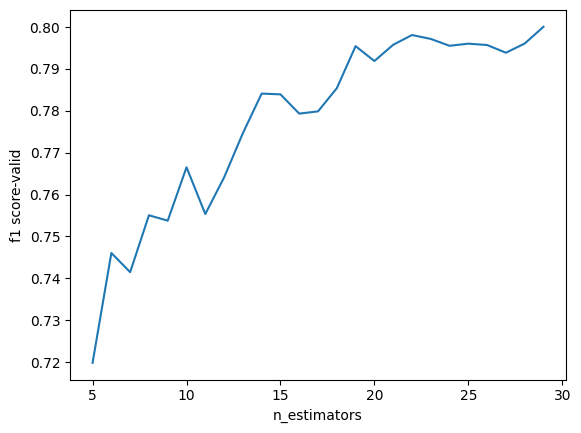

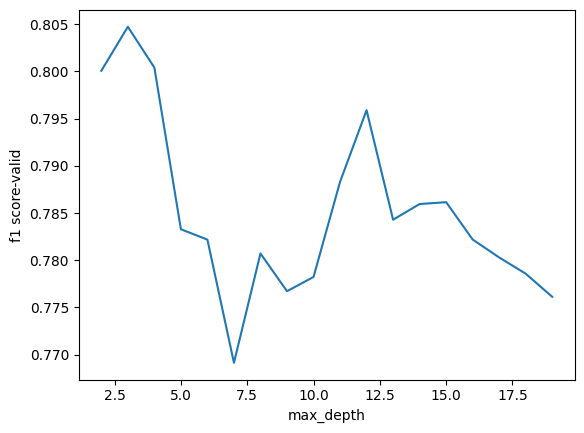

f1 score for train:0.8679455482426305, f1 score for test:0.8388168533633549, f1 score for validation:0.8047153230911379 for optimal depth:3 and optimal n_estimators:29
classification report for validation
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       165
           1       0.62      0.82      0.71       118
           2       0.80      0.75      0.77       106
           3       0.91      0.67      0.77       110

    accuracy                           0.80       499
   macro avg       0.81      0.79      0.79       499
weighted avg       0.82      0.80      0.80       499

classification report for test
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       198
           1       0.67      0.85      0.75       102
           2       0.90      0.75      0.82       109
           3       0.82      0.71      0.76        91

    accuracy                           0.84       500
   

In [ ]:
# xgboost for fbow

y_v1=y_v-1
y_te1=y_te-1
y_tr1=y_tr-1
scores_n=[]
estimators=range(5,30)
for n in estimators:
  xgb_sk = xgb.XGBClassifier(n_estimators=n, max_depth=2, random_state=42)
  xgb_sk.fit(xtr_fbow, y_tr1)
  xgb_pred_v = xgb_sk.predict(xv_fbow)
  f1_v=f1_score(y_v1,xgb_pred_v,average="weighted")
  scores_n.append(f1_v)
opt_n_estimators=np.argmax(scores_n)+5

plt.plot(estimators,scores_n)
plt.xlabel("n_estimators")
plt.ylabel("f1 score-valid")
plt.show()

scores_depth=[]
depth=range(2,20)
for max in depth:
  xgb_sk = xgb.XGBClassifier(n_estimators=opt_n_estimators, max_depth=max, random_state=42)
  xgb_sk.fit(xtr_fbow, y_tr1)
  xgb_pred_v = xgb_sk.predict(xv_fbow)
  f1_v=f1_score(y_v1,xgb_pred_v,average="weighted")
  scores_depth.append(f1_v)
opt_depth=np.argmax(scores_depth)+2

plt.plot(depth,scores_depth)
plt.xlabel("max_depth")
plt.ylabel("f1 score-valid")
plt.show()
xgb_sk = xgb.XGBClassifier(n_estimators=opt_n_estimators, max_depth=opt_depth, random_state=42)
xgb_sk.fit(xtr_fbow, y_tr1.ravel())
xgb_pred_v = xgb_sk.predict(xv_fbow)
xgb_pred_te = xgb_sk.predict(xte_fbow)
xgb_pred_tr = xgb_sk.predict(xtr_fbow)
f1_tr=f1_score(y_tr1,xgb_pred_tr,average="weighted")
f1_te=f1_score(y_te1,xgb_pred_te,average="weighted")
f1_v=f1_score(y_v1,xgb_pred_v,average="weighted")
print(f"f1 score for train:{f1_tr}, f1 score for test:{f1_te}, f1 score for validation:{f1_v} for optimal depth:{opt_depth} and optimal n_estimators:{opt_n_estimators}")
R = classification_report(y_v1, xgb_pred_v)
print("classification report for validation")
print(R)
R = classification_report(y_te1, xgb_pred_te)
print("classification report for test")
print(R)

